# Introduction to NetworkX: Solving Simple Problems

**Author:** Tran Thu Le & ChatGPT  
**Date:** 18/02/2023  


**Abstract.** NetworkX is a Python library for the creation, manipulation, and study of complex networks. In this tutorial, we will learn how to solving the simple network problems uisng NetworkX:
- Shortest path
- Minimum spanning tree
- Minimum cut 

In [1]:
!pip install networkx 

## Create a Graph

Here we create and plot a graph with edge lengths and capacities.

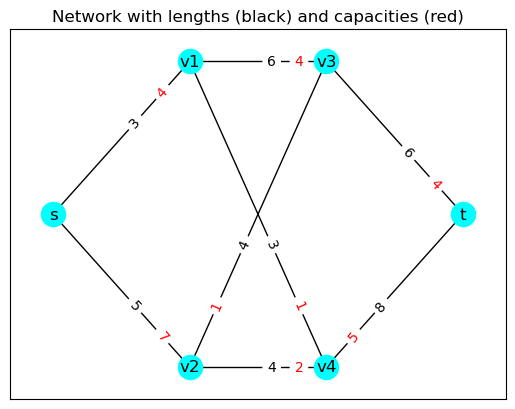

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
EDGES = [("s", "v1", {"len": 3, "cap": 4}),
         ("v1", "v3", {"len": 6, "cap": 4}),
         ("v3", "t", {"len": 6, "cap": 4}),
         ("s", "v2", {"len": 5, "cap": 7}),
         ("v2", "v4", {"len": 4, "cap": 2}),
         ("v4", "t", {"len": 8, "cap": 5}),
         ("v2", "v3", {"len": 4, "cap": 1}),
         ("v1", "v4", {"len": 3, "cap": 1})]

POSITIONS = {"s": (0, 0), "v1": (1, 1), "v2": (1, -1), "v3": (2, 1), "v4": (2, -1), "t": (3, 0)}

G = nx.Graph()
G.add_edges_from(EDGES)

# retrieve data 
lengths = nx.get_edge_attributes(G, 'len')
capacities = nx.get_edge_attributes(G, 'cap')


# plot the graph
nx.draw_networkx(G, pos=POSITIONS, node_color="cyan")
nx.draw_networkx_edge_labels(G, pos=POSITIONS, edge_labels=lengths, label_pos=0.4)
nx.draw_networkx_edge_labels(G, pos=POSITIONS, edge_labels=capacities,
                             label_pos=0.2, font_color="red")
plt.title("Network with lengths (black) and capacities (red)")
plt.show()

## Shortest path

In many graph problems, it is useful to find the shortest path between two nodes in a graph. For example, in a transportation network, we may want to find the shortest route between two cities. NetworkX provides several algorithms to compute the shortest path and its length in a graph.

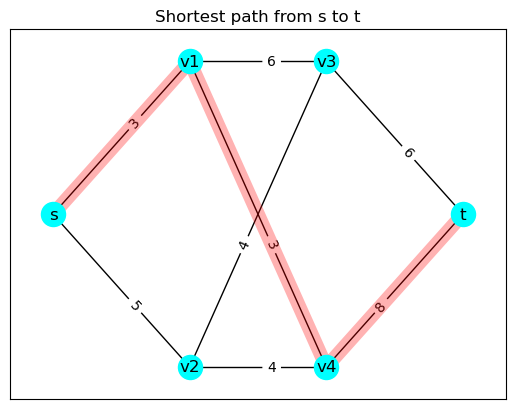

In [3]:
# find the shortest path
P = nx.shortest_path(G, source="s", target="t", weight='len')
edges_of_shortest_path = [(P[i], P[i+1]) for i in range(len(P)-1)]

# plot the graph and add shortest_path
nx.draw_networkx(G, pos=POSITIONS, node_color="cyan")
nx.draw_networkx_edge_labels(G, pos=POSITIONS, edge_labels=lengths, label_pos=0.4)
nx.draw_networkx_edges(G, pos=POSITIONS, edgelist=edges_of_shortest_path,
                       edge_color="red", width=10, alpha=0.3)
plt.title("Shortest path from s to t")
plt.show()

## Spanning Tree

A spanning tree of a graph is a tree that spans all of the nodes in the graph, that is, it is a subgraph of the graph that is a tree and includes all of the nodes in the original graph.

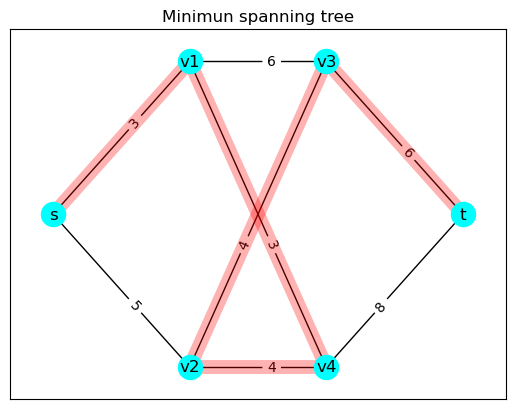

In [4]:

# Compute the minimum spanning tree
T = nx.minimum_spanning_tree(G, weight="len")

# plot graph G and minimum spanning tree T
nx.draw_networkx(G, pos=POSITIONS, node_color="cyan")
nx.draw_networkx_edge_labels(G, pos=POSITIONS, edge_labels=lengths, label_pos=0.4)
nx.draw_networkx_edges(G, pos=POSITIONS, edgelist=T.edges,
                       edge_color="red", width=10, alpha=0.3)
plt.title("Minimun spanning tree")
plt.show()

## Min cut

Minimum cuts in a graph are the edges that, when removed, disconnect the graph into two disconnected components with the total capacity being smallest.

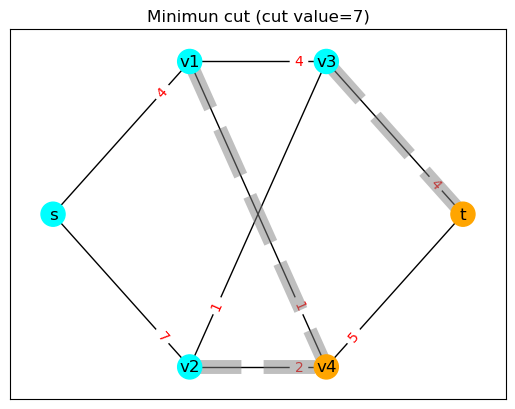

In [5]:
cut_value, partition = nx.minimum_cut(G, "s", "t", capacity="cap")
reachable, non_reachable = partition 

edges_cut = []
for v1 in reachable:
    for v2 in non_reachable:
        if (v1, v2) in G.edges:
            edges_cut += [(v1,v2)]


# plot graph G and min cut
node_colors = ['cyan' if n in reachable else 'orange' for n in G.nodes()]
nx.draw_networkx(G, pos=POSITIONS, node_color=node_colors)
nx.draw_networkx_edge_labels(G, pos=POSITIONS, edge_labels=capacities,
                             label_pos=0.2, font_color="red")
nx.draw_networkx_edges(G, pos=POSITIONS, edgelist=edges_cut,
                       edge_color="gray", width=10, alpha=0.5, style="--")
plt.title(f"Minimun cut (cut value={cut_value})")
plt.show()
